# Cookbook: MLE for Gutenberg-Richter Law

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# These are some parameters to make figures nice (and big)

plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

The Gutenberg-Richter Law describes the distribution of earthquake magnitude. It is usualyl written in terms of the total number of Earthquakes that occur in a given period in a given time frame. [Link: The Gutenberb-Richter law on wikipedia](https://en.wikipedia.org/wiki/Gutenberg%E2%80%93Richter_law#).

The Gutenberg-Richter law models the number of earthquakes as:

$$\log_{10} N = a-bM$$ 


# Data: August 2016 Central Italy Earthquake



Let's visualize the Gutenberg-Richter law using data for the aftershocks of the [August 2016 Central Italy Earthquake](https://en.wikipedia.org/wiki/August_2016_Central_Italy_earthquake).




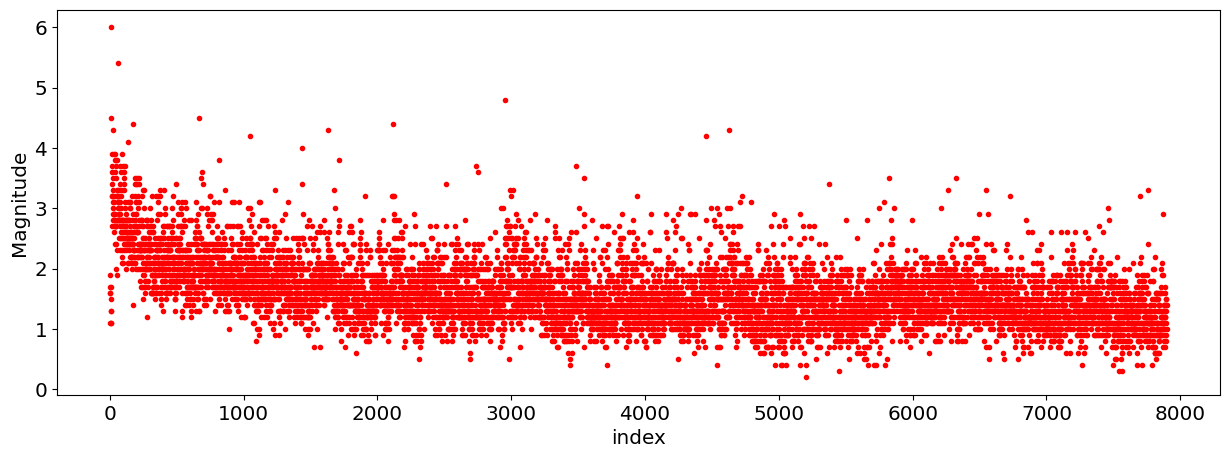

In [2]:
# Read in data into a pandas dataframe (data hosted online)
df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/2016_Central_Italy_Earthquake.csv')
df.head()
plt.plot(df.Magnitude,'r.');
plt.ylabel('Magnitude');
plt.xlabel('index');

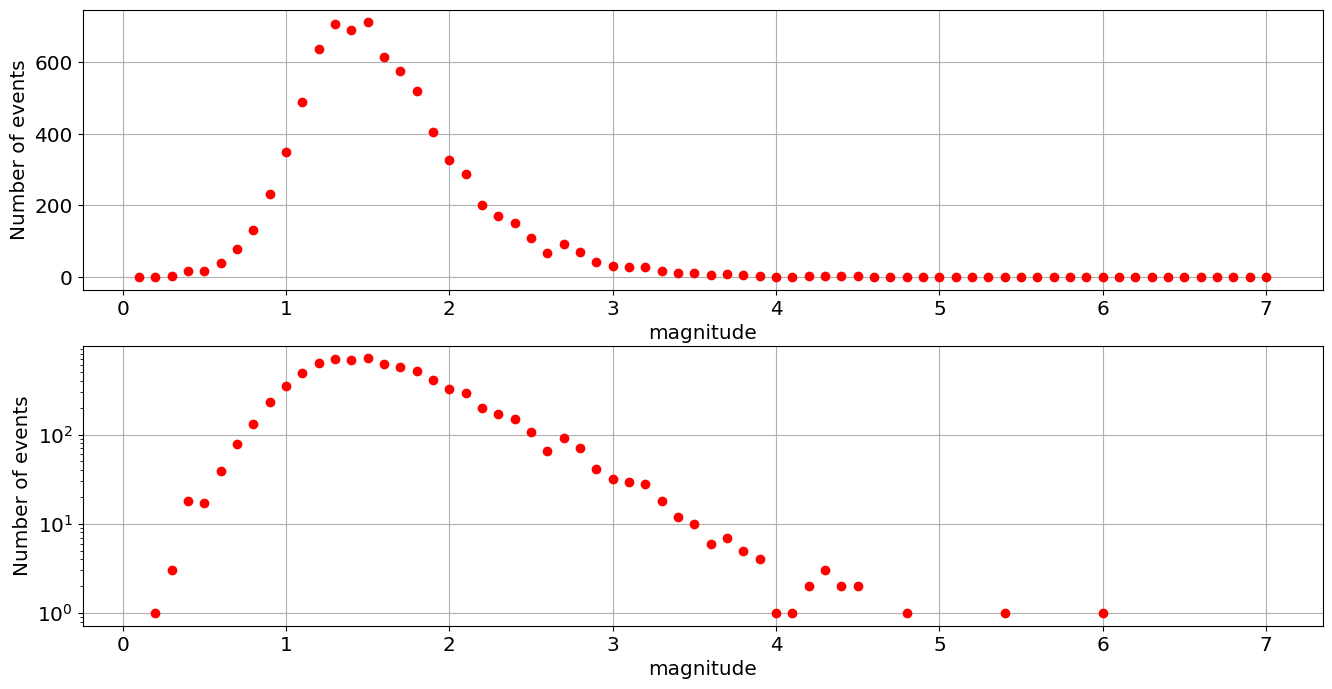

In [3]:
#now let's plot a histogram of the number of events as a function of magnitude.

#define the bins: 
#let's use bins that are 0.1 in width, so we can plot magnitude from 0.1 to 6.5 in increments of 0.1

#we want the bins centered on 0.1,0.2, and so on, so the bin edges must be 0.05, 0.15, 0.25, etc.
bin_edges=np.arange(0.05,7.15,0.1)

#let's save the bin centers as well for plotting.
# We can do that by averaging the values of the left bin edges and the right bin edges
bin_centers=bin_centers=(bin_edges[0:-1]+bin_edges[1:])/2

# we could also just define the bin centers as below
# but that is more error prone. It it safer to just compute the bin centers as a function of the bin edges
#bin_centers=np.arange(0.1,7.1,0.1)

histogram=np.histogram(df.Magnitude,bin_edges)
counts=histogram[0]

fig,axs=plt.subplots(2,1,figsize=[16,8])

#first let's plot the data on a regular axis
plt.subplot(2,1,1)
plt.plot(bin_centers,counts,'ro')
plt.grid()
plt.xlabel('magnitude');
plt.ylabel('Number of events');

#now, let's plot the data with the y-axis being logarithmic, since the G-R law is expressed in terms of the logarithm of N.
plt.subplot(2,1,2)
plt.plot(bin_centers,counts,'ro')

plt.yscale('log')
plt.grid()
plt.xlabel('magnitude');
plt.ylabel('Number of events');


You can see that for events larger than $M\approx 1.5$ the data follows a linear slope in the plot on the logarithmic axis. This is what you would expect since $\log_{10}N=a-bM$. At magnitudes less than $1.5$ we are running into recorder bias. The instruments cannot reliably detect earthquakes smaller than $M=1.5$, so they are not recorded. 

If we ignore the data below $M_{min}=1.5$ we can write the Gutenberg-Richter law as: 

$$\log_{10}N=a-b(M-M_{min})$$

Let's plot that below:

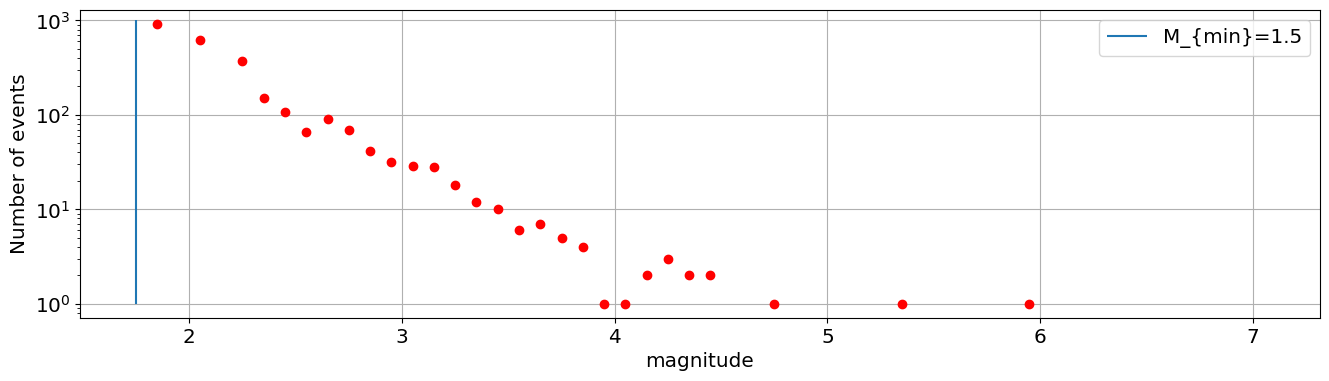

In [4]:
M_min=1.75
M=df.Magnitude.values;
M=M[M>M_min]

bin_edges=np.arange(M_min+0.05,7.15,0.1)
bin_centers=bin_centers=(bin_edges[0:-1]+bin_edges[1:])/2
histogram=np.histogram(M,bin_edges)
counts=histogram[0]

fig,axs=plt.subplots(1,figsize=[16,4])
plt.plot(bin_centers,counts,'ro')
plt.grid()
plt.yscale('log')
plt.vlines(M_min,1,1000,label='M_{min}=1.5')
plt.xlabel('magnitude')
plt.ylabel('Number of events')
plt.legend();


# Interpretation of the G-R law


What does the Gutenberg-Richter law tell us:
-  The parameter $a$ describes the *seismicity* of an area (how many total events occur in a given period)
-  the parameter *b* describes the *distribution* of earthquakes in terms of their magnitude.

The slope $b$ tells us the relative frequency of events:

$$ \frac{N(M_i)}{N(M_j)}=\frac{10^{a-bM_i}}{10^{a-bM_j}}=10^{b(M_j-M_i)}$$

For example, this tells us that that there are $10^b$ $M=4$ every magnitude $M=5$ event:

$$ \frac{N(M=4)}{N(M=5)}=\frac{10^{a-bM_i}}{10^{a-bM_i}}=10^{b(5-4)}=10^b$$

Many places have b-values around 1, meaning that there is around one Magnitude $M=5$ event for every 10 Magnitude $M=6$ events; one Magnitude $M=6$ event for every Magnitude $M=5$ event and so on. 

# Normalization: G-R law as distribution
Note that the G-R law is written in terms of number of events $N$ so it is not actually a proper distribution, since it does not sum to 1. To write it as a distribution, we would need to write it as: 

$$N(M)=N_{tot}p(M)$$ 

where $N_{tot}$ is the total number of Earthquakes above $M_{min}$, and $p(M)$ is a probabiltiy density function that integrates to 1. This way, the G-R law would integrate to $N_{tot}$. 

Setting the condition that $N(M)$ integrates to the $N_{tot}$, we get:

$$N_{tot}=E(M)=\int_{M_{min}}^{\infty}N(M)dM=\int_{M_{min}}^{\infty}10^{a-b(M-M_{min}}dM=\frac{10^{a}}{\ln10\cdot b}$$

$$ a=\log{10} N_{tot}+\log_{10}b \ln10$$ 

$$ N=N_{tot}\cdot b \cdot \ln10\cdot10^{-b(M-M_{min})}=N_{tot}\cdot p_{GR}(M)$$

What we have done is reparametrized the G-R law from a function of $a,b$ to a function of $N_{tot}$ and $b$, which, in turns, allowed us to write it as a probability distribution function times a normalization constant. Now we can do some statistics. 

# Maximum Likelihood Estimator for G-R

The goal is to fit the Gutenberg-Richter law for Earthquakes of magnitude larger than $M_{min}=1.5$. This can be done by doing a linear regression, or least squares fit on the plot above, but as we shall see in next lecture, that is ill advised, as it tends to put too much weight on the high-magnitude earthquakes for which we have very few data points. 

Instead, we shall use the maximum-likelihood approach. 

The likelihood of the data (i.e. the measured magnitudes $x=\{M_i\}$), given a value of the parameter $\theta={b}$ is: 

$$\mathcal L =p(x|\theta)=p(\{M_i\}|b)=\prod_i p(M_i|\theta)=\prod_i b\ln (10)\cdot 10^{-b(M_{min}-M)}$$ 

where we have assumed that the magnitudes of different events are independent (a potentially dubious approximation). The log-likelihood becomes:

$$\log\mathcal{L}=\sum_i \ln b+\ln(\ln10)+\ln10\cdot (b\cdot (M_{min}-M_i))$$

$$\log\mathcal{L}=N_{tot}\ln b+N_{tot}\ln(\ln10)+\ln10\sum_ib\cdot (M_{min}-M_i)$$

Setting $d\log\mathcal{L} /db =0$ we get

$$0=\frac{n}{\hat b_{mle}}-\sum\ln 10\left(M_{min}-M\right)$$

$$\hat b_{mle}=\frac{N_{tot}}{\sum\ln 10\left(M_{min}-M\right)}$$

Let's compute the MLE estimator

In [5]:


M_min=1.5
M=df.Magnitude.values;
M=M[M>M_min]

Ntot=len(M)

bhat=Ntot/np.sum( np.log(10)*(M-M_min))

print(bhat)


0.828204706881597


Now let's plot the distribution we estimated via the MLE 

$$\hat p_{GR}= \hat b_{mle} \cdot \ln10\cdot10^{-\hat b_{mle} (M-M_{min})}$$

and compare with the distribution of earthquakes $> M_{min}$ in the data:

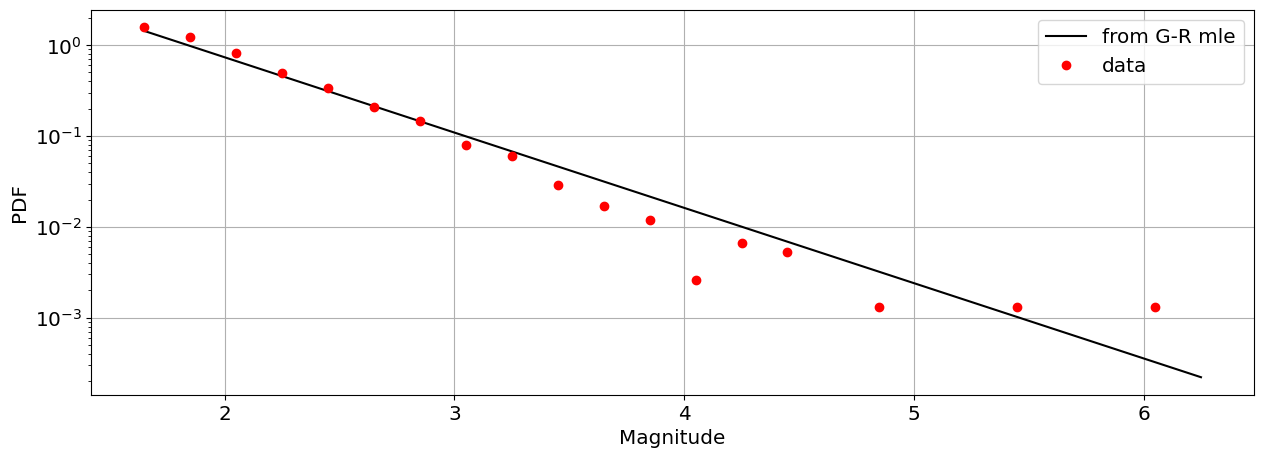

In [6]:
bin_edges=np.arange(M_min+0.05,6.45,0.2)
bin_centers=bin_centers=(bin_edges[0:-1]+bin_edges[1:])/2


X=bin_centers
pdf=bhat*np.log(10)*10**(bhat*(M_min-X))
histogram=np.histogram(M,bin_edges,density='true')
freq=histogram[0]

plt.plot(X,pdf,'k-',label='from G-R mle')
plt.plot(bin_centers,freq,'ro',label='data')
plt.yscale('log')
plt.grid()
plt.xlabel('Magnitude')
plt.ylabel('PDF')
plt.legend()

# Relation to Pareto distribution
Since the magnitude is itself a logarithmic function of the seismic wave amplitude, $M=\log_{10}A$, this means that the G-R law is a type of Pareto distribution, with pdf:

$$p(A)=p(A)=\frac{bA_{min}^{b}}{A^{b+1}}$$ 

to show this, we can set $M=\log_{10}A$ in the equation for $p_{GR}$ and use the formula for reparameterizing a pdf:

$$ p(M)=p(A)\frac{dA}{dM}$$

The MLE estimator for the Pareto distribution can be found, [e.g. on Wikipedia](https://en.wikipedia.org/wiki/Pareto_distribution#Statistical_inference) as:

$$\hat{b}_{mle}=\frac{N_{tot}}{\sum_i \ln (A_i/A_{min})}$$

Setting $A_i=10^{M_i}$ allows us to recover the MLE formula we computed earlier